<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/kaggle/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
! wget "https://raw.githubusercontent.com/fgith/data-science/main/datasets/healthcare-dataset-stroke-data.csv"

--2022-05-24 10:53:37--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/healthcare-dataset-stroke-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316971 (310K) [text/plain]
Saving to: ‘healthcare-dataset-stroke-data.csv.3’

healthcare-dataset- 100%[===================>] 309.54K  --.-KB/s    in 0.03s   

2022-05-24 10:53:37 (9.36 MB/s) - ‘healthcare-dataset-stroke-data.csv.3’ saved [316971/316971]



# **1. Load Data**

In [19]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **2. Explore Data**

In [20]:
print('----------Dataset Shape----------')
print('No of Rows: ', df.shape[0],'| No of Columns: ',df.shape[1])
print('Columns:', df.columns.tolist())
print('---------------------------------')
print('----Column-wise unique values----')
cols = ['gender','hypertension','ever_married','work_type','Residence_type','smoking_status','stroke','heart_disease']
for i in range(len(cols)):
  print(cols[i],": ",df[cols[i]].unique().tolist())
print('---------------------------------')
print('-----Column-wise Nulls Dtype-----')
print(df.info())
print('---------------------------------')
print("No of Null values in column \'bmi':",df.bmi.isna().sum())

----------Dataset Shape----------
No of Rows:  5110 | No of Columns:  12
Columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
---------------------------------
----Column-wise unique values----
gender :  ['Male', 'Female', 'Other']
hypertension :  [0, 1]
ever_married :  ['Yes', 'No']
work_type :  ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Residence_type :  ['Urban', 'Rural']
smoking_status :  ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
stroke :  [1, 0]
heart_disease :  [1, 0]
---------------------------------
-----Column-wise Nulls Dtype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   objec

**Observations:**
* Column 'bmi' has 201 Null values. These need to be transformed into numerical values later in the code
* Columns 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status' have Dtype Object/String. These need to be transformed into numerical values later in the code

**Let's do the following:**
*   Drop un-needed column 'id'

In [21]:
# Drop column 'id'
df.drop('id', axis=1, inplace = True)
df = df.reset_index(drop = True)

In [22]:
# Check unique value counts in columns 'gender', 'work_type', 'smoking_status'
print(df.gender.value_counts(),"\n")
print(df.age.std(),"\n")
print(df.hypertension.value_counts(),"\n")
print(df.heart_disease.value_counts(),"\n")
print(df.ever_married.value_counts(),"\n")
print(df.work_type.value_counts(),"\n")
print(df.Residence_type.value_counts(),"\n")
print(df.smoking_status.value_counts(),"\n")
print(df.stroke.value_counts(),"\n")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

22.61264672311352 

0    4612
1     498
Name: hypertension, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



**Observations:**

*   'gender' has 1 row as 'Other'. The rest are either 'Female' or 'Male'. This row can be dropped without any significant impact
*   'work_type' has several categories. These will be homogenized and numerical encoded later in code
*   'smoking_status' has several categories. These can be homogenized nd numerical encoded later in code
*   'ever_married' and 'Residence_type' have string values. These will be numerical binary encoded late in code

**Next:**

*   Drop row with 'gender' as 'Other'

In [23]:
# Display row with 'gender' is 'Other'
display(df[df['gender'] == 'Other'])

# Drop row
df.drop(df.index[df['gender'] == 'Other'], inplace=True)

# Reset index of dataframe
df = df.reset_index(drop = True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


# **3. Data Preprocessing**

**3.1 Outlier Removal**

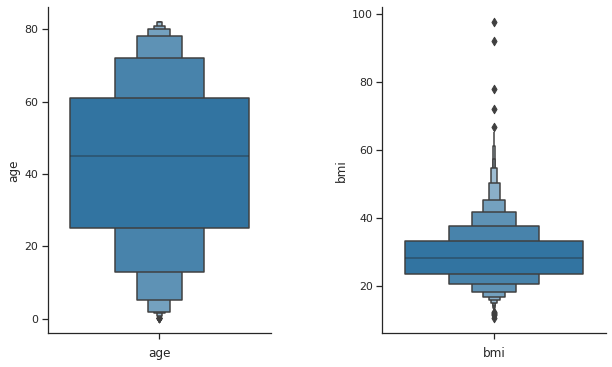

In [24]:
# Find outliers in the contiguos data columns 'age', 'bmi'
sns.set_theme(style="ticks", palette="tab10")

cols = ['age','bmi']

fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

fig.subplots_adjust(wspace=0.5)
sns.despine()

**Observations:**

*   'bmi' has outlier values > 80. These can be deleted


**Next:**

*   Drop rows with 'bmi' > 80

In [25]:
# Display rows with 'bmi' > 80
display(df[df['bmi'] > 80])

# Drop row
df.drop(df.index[df['bmi'] > 80], inplace=True)

# Reset index of dataframe
df = df.reset_index(drop = True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4208,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


**3.2 Data Transformation**

In [28]:
# Private          2925
# Self-employed     819
# children          687
# Govt_job          657
# Never_worked       22
# Name: work_type

# Urban    2596
# Rural    2514
# Name: Residence_type

# never smoked       1892
# Unknown            1544
# formerly smoked     885
# smokes              789
# Name: smoking_status
dict_work_type ={'Private' : 1,
                 'Self-employed' : 1,
                 'children': 0,
                 'Govt_job' : 1,
                 'Never_worked' : 0}
df['work_type'],df['work_type'].replace(dict_work_type, inplace = True)


0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5102          Private
5103    Self-employed
5104    Self-employed
5105          Private
5106         Govt_job
Name: work_type, Length: 5107, dtype: object 0       1
1       1
2       1
3       1
4       1
       ..
5102    1
5103    1
5104    1
5105    1
5106    1
Name: work_type, Length: 5107, dtype: int64


In [ ]:
df.fillna(0, inplace=True)
X = df.drop(['stroke','gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
# X = df.drop(['stroke'],axis=1)
y = df['stroke'].to_frame()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=20)
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)

0.9527886497064579


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


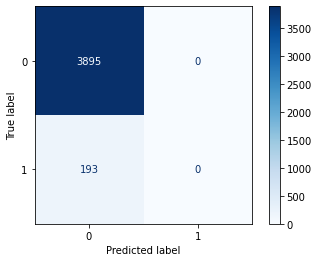

In [ ]:
voting_clf = VotingClassifier(estimators = [('lr',log_clf),('rf',rnd_clf),('svc',svc_clf)],voting='hard')
voting_clf.fit(X_train,np.ravel(y_train))
y_pred = voting_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
cross_val_score(voting_clf, X_train, np.ravel(y_train)).mean() # Cross val score
plot_confusion_matrix(voting_clf, X_test, y_test, cmap = 'Blues', values_format = 'd')

In [ ]:
params = { 'voting' : ['hard','soft'],
          'weights' : [(1,1,2),(2,1,1),(1,2,1)]
}
grid = GridSearchCV(voting_clf, params)
grid.fit(X_train, np.ravel(y_train))
grid.best_params_

{'voting': 'hard', 'weights': (1, 1, 2)}

In [ ]:
grid.best_score_

0.9452080344332856

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svc_clf,voting_clf):
  clf.fit(X_train,np.ravel(y_train))
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.9525440313111546
RandomForestClassifier 0.9488747553816047
SVC 0.9527886497064579
VotingClassifier 0.9527886497064579


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=20)
rf_clf.fit(X_train, y_train)
rf_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred = rf_clf.predict(X_test)

[[3895    0]
 [ 193    0]]
0.9527886497064579


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


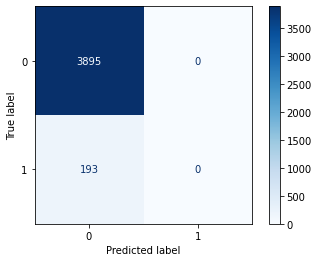

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
plot_confusion_matrix(voting_clf, X_test, y_test, cmap = 'Blues', values_format = 'd')